In [ ]:
import neutromeratio
from openmmtools.constants import kB
from simtk import unit
import numpy as np
import pickle
import mdtraj as md
import torchani
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from pymbar import BAR
from neutromeratio.constants import kT

In [ ]:
exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))
qm_results = pickle.load(open('../data/qm_results.pickle', 'rb'))

In [33]:
# specify the system you want to simulate
#name = 'molDWRow_298'
#name = 'molDWRow_37'
#name = 'molDWRow_45'
#name = 'molDWRow_160'
name = 'molDWRow_590'


from_mol_tautomer_idx = 1
to_mol_tautomer_idx = 2


t1_smiles = exp_results[name]['t1-smiles']
t2_smiles = exp_results[name]['t2-smiles']

# generate both rdkit mol
mols = { 't1' : neutromeratio.generate_rdkit_mol(t1_smiles), 't2' : neutromeratio.generate_rdkit_mol(t2_smiles) }
from_mol = mols[f"t{from_mol_tautomer_idx}"]
to_mol = mols[f"t{to_mol_tautomer_idx}"]
ani_input = neutromeratio.from_mol_to_ani_input(from_mol)

In [34]:
e_1 = []
for m in qm_results[name][t1_smiles]['vac']:
    e_1.append(float(m.GetProp('G')))
e_2 = []
for m in qm_results[name][t2_smiles]['vac']:
    e_2.append(float(m.GetProp('G')))
print(min(e_2) - min(e_1))

-3.3577655180124566


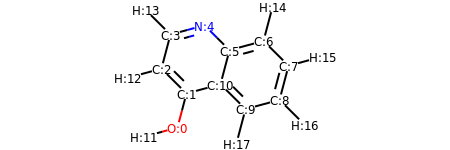

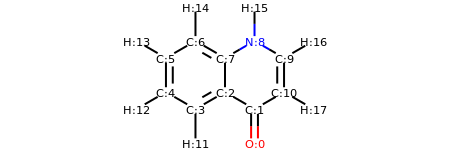

In [35]:
neutromeratio.display_mol(mols['t1'])
neutromeratio.display_mol(mols['t2'])

In [39]:
# number of time steps
nr_of_mc_trials = 1000
nr_of_runs = 60
work_in_runs = {}

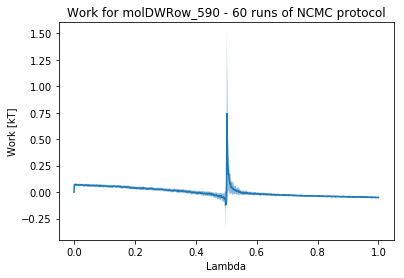

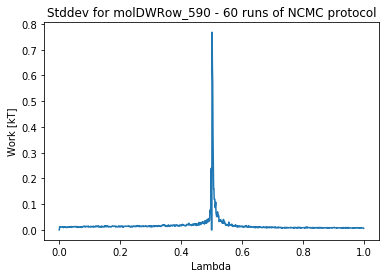

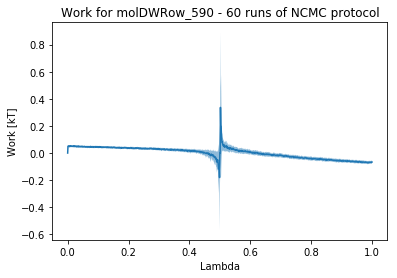

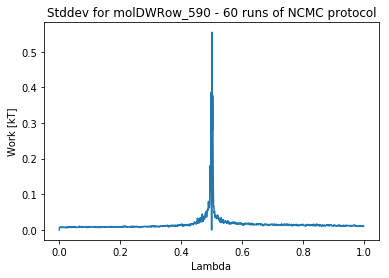

In [40]:
import matplotlib.pyplot as plt


for t_state in ['t1', 't2']:

    if t_state == 't1':
        from_mol_tautomer_idx = 1
        to_mol_tautomer_idx = 2
    else:
        from_mol_tautomer_idx = 2
        to_mol_tautomer_idx = 1
        
    work_in_runs = dict()
    for run_nr in range(nr_of_runs):
        # read work values
        f = open(f"../data/md_mc_sampling/{name}/{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_NCMC_work_run_nr_{run_nr}.csv", 'r')
        work = []
        for line in f.readlines():
            i, j = line.split(',')
            work.append(float(j.rstrip()))
        work_in_runs[run_nr] = work
        f.close()


    error = []
    energy = []
    for i in range(len(work_in_runs[0])):
        energy_list = []
        for n in work_in_runs:
            energy_list.append(work_in_runs[n][i])

        energy.append(np.mean(energy_list))
        error.append(np.std(energy_list))

    plt.plot(np.linspace(0, 1, len(work_in_runs[0])), energy)
    plt.fill_between(np.linspace(0, 1, len(work_in_runs[0])), np.array(energy)-np.array(error), np.array(energy) + np.array(error), alpha=0.5)
    plt.title(f"Work for {name} - {nr_of_runs} runs of NCMC protocol")
    plt.xlabel('Lambda')
    plt.ylabel('Work [kT]')
    plt.savefig(f"../data/md_mc_sampling/{name}/work_summary_{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_NCMC.png")
    plt.show()


    plt.plot(np.linspace(0, 1, len(error)), error)
    plt.title(f"Stddev for {name} - {nr_of_runs} runs of NCMC protocol")
    plt.xlabel('Lambda')
    plt.ylabel('Work [kT]')
    plt.savefig(f"../data/md_mc_sampling/{name}/work_stddev_{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_NCMC.png")
    plt.show()



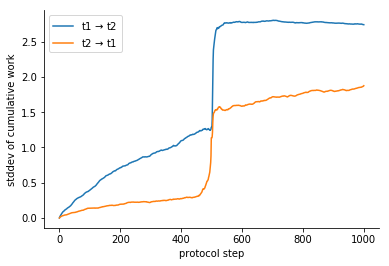

In [41]:
ax = plt.subplot(1,1,1)


for t_state in ['t1', 't2']:

    if t_state == 't1':
        from_mol_tautomer_idx = 1
        to_mol_tautomer_idx = 2
    else:
        from_mol_tautomer_idx = 2
        to_mol_tautomer_idx = 1
        
    work_in_runs = dict()
    for run_nr in range(nr_of_runs):
        # read work values
        f = open(f"../data/md_mc_sampling/{name}/{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_NCMC_work_run_nr_{run_nr}.csv", 'r')
        work = []
        for line in f.readlines():
            i, j = line.split(',')
            work.append(float(j.rstrip()))
        work_in_runs[run_nr] = work
        f.close()
             
    cumulative_works = np.array([np.cumsum(w) for w in work_in_runs.values()])
    cumulative_works_stddev = np.std(cumulative_works, 0)

    if t_state == 't1':
        plt.plot(cumulative_works_stddev, label=r't1 $\to$ t2')
    else:
        plt.plot(cumulative_works_stddev, label=r't2 $\to$ t1')
        
plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('stddev of cumulative work')
plt.xlabel('protocol step')
plt.savefig(f"../data/md_mc_sampling/{name}/cwork_stddev_{name}_NCMC.png")
plt.show()

Bar estimate: -0.324864 kcal/mol with stddev: 0.110404 kcal/mol


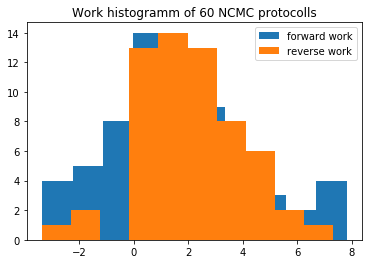

In [42]:
for t_state in ['t1', 't2']:

    if t_state == 't1':
        from_mol_tautomer_idx = 1
        to_mol_tautomer_idx = 2
    else:
        from_mol_tautomer_idx = 2
        to_mol_tautomer_idx = 1
        
    work_in_runs = dict()
    for run_nr in range(nr_of_runs):
        # read work values
        f = open(f"../data/md_mc_sampling/{name}/{name}_from_t{from_mol_tautomer_idx}_to_t{to_mol_tautomer_idx}_NCMC_work_run_nr_{run_nr}.csv", 'r')
        work = []
        for line in f.readlines():
            i, j = line.split(',')
            work.append(float(j.rstrip()))
        work_in_runs[run_nr] = work
        f.close()

    if t_state == 't1':
        energy_list_f = []
        for n in work_in_runs:
            energy_list_f.append(np.sum(work_in_runs[n]))
        plt.hist(energy_list_f, label='forward work')
    else:
        energy_list_r = []
        for n in work_in_runs:
            energy_list_r.append(np.sum(work_in_runs[n]))
        plt.hist(energy_list_r, label='reverse work')


bar_est = BAR(np.array(energy_list_f), np.array(energy_list_r))

print('Bar estimate: {:2.6f} kcal/mol with stddev: {:2.6f} kcal/mol'.format((bar_est[0] * kT).value_in_unit(unit.kilocalorie_per_mole), (bar_est[1] * kT).value_in_unit(unit.kilocalorie_per_mole)))

plt.title(f"Work histogramm of {nr_of_runs} NCMC protocolls")
plt.legend()
plt.savefig(f"../data/md_mc_sampling/{name}/work_hist_{name}_NCMC.png")
plt.show()
